# Videos and Exercises for Session 11: Regression and Regularization

In this combined teaching module and exercise set, you will learn about linear regression models in a machine learning perspective. We will see how overfitting can arise and how we can tackle it with a modification of the linear regression model.

The structure of this notebook is as follows:
1. Linear Regression Mechanics
2. Overfitting and Underfitting in Linear Regression
    - Exploring Overfitting in Linear Regression
    - A Cure for Overfitting in Linear Regression
3. Modelling Houseprices (Exercise)

## Packages
First, we need to import our standard stuff. Notice that we are not interested in seeing the convergence warning in scikit-learn, so we suppress them for now.

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

%matplotlib inline

# Part 1: Linear Regression Mechanics
## Implementing and evaluating the gradient decent 
 
Normally we use OLS to estimate linear regression models, but this is only way of solving the problem of minimizing the least squares problem (that minimizes the sum of squared errors). In the video below we show how to implement gradient descent below and compare it along with other approximate solutions to OLS.

## Overblik over Exercise 11.1 og formålet med opgaven

- Ex. 11.1.0: Importing Data:
- - Purpose: To get comfortable with loading datasets using libraries like Seaborn. Loading and exploring data is the first step in any data analysis task.
- Ex. 11.1.1: Data Preprocessing:
- - Purpose: Understand how to prepare data by converting categorical variables into a format suitable for machine learning. This step ensures the dataset is in the right shape for model training.
- Ex. 11.1.2: Train-Test Split:
- - Purpose: Recognize the importance of splitting data into training and testing subsets. This allows for model validation and helps prevent overfitting.
- Ex. 11.1.3: Feature Normalization:
- - Purpose: Grasp the importance of scaling features so that they have a similar scale. It helps algorithms converge faster and leads to better model performance.
- Ex. 11.1.4: Compute Error:
- - Purpose: Understand the concept of prediction error. It's the difference between the predicted and actual values. Reducing this error is the main goal of training a machine learning model.
- Ex. 11.1.5: Weight Update Mechanism:
- - Purpose: Introduce the core logic of gradient descent. Here, the weight of each feature is adjusted iteratively to minimize the prediction error.
- Ex. 11.1.6: Weight Initialization and Iteration:
- - Purpose: Understand the importance of weight initialization and how iterative updates (using the logic from the previous exercise) help in model optimization.
- Ex. 11.1.7: Model Validation and Visualization:
- - Purpose: Validate the custom-built gradient descent solution against a standard library implementation, ensuring its correctness. Visualizing the error helps understand how well the model is performing.


We continue straight to an exercise where you are to implement a new estimator that we code up from scratch. We solve the numerical optimization using the gradient decent algorithm. This will be very similar to what we just saw in the video, but we will pay a bit more attention to each step in the process.

Using our algorithm, we will fit it to some data, and compare our own solution to the standard solution from `sklearn`

> **Ex. 11.1.0**: Import the dataset `tips` from the `seaborn`.


*Hint*: use the `load_dataset` method in seaborn

In [2]:
# Load the CSV file from your computer
Data = pd.read_csv('Data_wo_outliers.csv')



In [3]:
# Dropping the first two columns


> **Ex. 11.1.1**:Restructure the data so we get a dataset `y` containing the variable tip, and a dataset `X` containing the 
features. 



In [4]:
# YOUR CODE HERE
y = Data['Monthly rent'] #will contain the values from the "Monthly rent" column. (Target)
X = Data.drop('Monthly rent', axis=1) #will contain the values from all other columns, excluding "Monthly rent" (features)


> **Ex. 11.1.2**: Divide the features and target into test and train data. Make the split 50 pct. of each. The split data should be called `X_train`, `X_test`, `y_train`, `y_test`.

> *Hint*: You may use `train_test_split` in `sklearn.model_selection`.

In [5]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


> **Ex. 11.1.3**: Normalize your features by converting to zero mean and one std. deviation.

> *Hint*: Take a look at `StandardScaler` in `sklearn.preprocessing`. If in doubt about which distribution to scale, you may read [this post](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


> **Ex. 11.1.4**: Make a function called `compute_error` to compute the prediction errors given input target `y_`, input features `X_` and input weights `w_`. You should use matrix multiplication.
>
> *Hint:* You can use the net-input fct. from yesterday.



In [7]:
# YOUR CODE HERE
def compute_error(y_, X_, w_):
    """Compute the prediction errors."""
    predictions = X_.dot(w_)
    errors = y_ - predictions
    return errors


> **Ex. 11.1.5**: Make a function to update the weights given input target `y_`, input features `X_` and input weights `w_` as well as learning rate, $\eta$, i.e. greek `eta`. You should use matrix multiplication.

In [8]:
# INCLUDED IN ASSIGNMENT 2

In [9]:
# YOUR CODE HERE
def update_weights(y_, X_, w_, eta):
    # Compute the prediction errors
    errors = y_ - np.dot(X_, w_[1:]) - w_[0]
    
    # Update the weights using the gradient descent formula
    w_[1:] += eta * X_.T.dot(errors)
    w_[0] += eta * errors.sum()
    
    return w_


> **Ex. 11.1.6**: Use the code below to initialize weights `w` at zero given feature set `X`. Notice how we include an extra weight that includes the bias term. Set the learning rate `eta` to 0.001. Make a loop with 50 iterations where you iteratively apply your weight updating function. 

>```python
w = np.zeros(1+X_train.shape[1])
```

In [10]:
# INCLUDED IN ASSIGNMENT 2

In [11]:
# YOUR CODE HERE
w = np.zeros(1+X_train.shape[1]) # Initialize weights
eta = 0.001 # Learning rate

# Iteratively update weights
for _ in range(50):
    w = update_weights(y_train, X_train, w, eta)


> **Ex. 11.1.7**: Make a function to compute the mean squared error. Alter the loop so it makes 100 iterations and computes the MSE for test and train after each iteration, plot these in one figure. 

> Hint: You can use the following code to check that your model works:
>```python
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
assert((w[1:] - reg.coef_).sum() < 0.01)
```

The code updates the weights over 100 iterations, computes the MSE for both the training and test datasets at each iteration, and finally plots these MSE values using the pd.Series(...).plot() commands you mentioned.

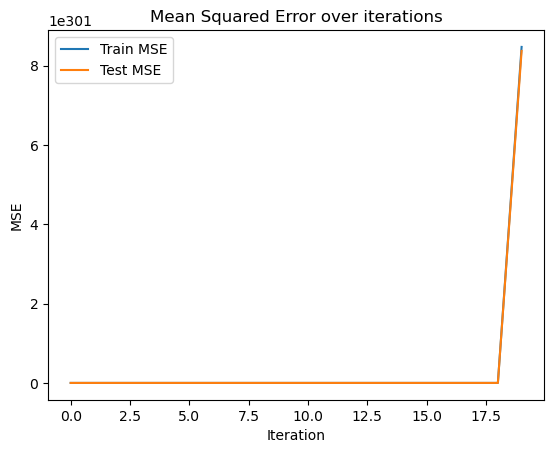

<AxesSubplot: >

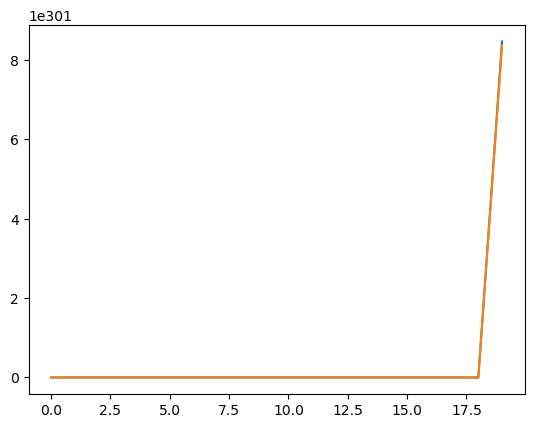

In [16]:
# YOUR CODE HERE
# Function to compute mean squared error
def compute_mse(y, X, w):
    # Add a column of ones to X for the bias term
    X = np.c_[np.ones(X.shape[0]), X]
    
    # Compute the predictions
    y_pred = np.dot(X, w)
    
    # Compute the mean squared error
    mse = ((y - y_pred) ** 2).mean()
    
    return mse

w = np.zeros(1+X_train.shape[1]) # Initialize weights
eta = 0.001 # Learning rate

MSE_train = []  # list to store MSE values for training data
MSE_test = []   # list to store MSE values for testing data

# Iteratively update weights
for _ in range(100):
    w = update_weights(y_train, X_train, w, eta)
    MSE_train.append(compute_mse(y_train, X_train, w))
    MSE_test.append(compute_mse(y_test, X_test, w))

# Plotting the MSE values using pandas Series
pd.Series(MSE_train).plot(label='Train MSE')
pd.Series(MSE_test).plot(label='Test MSE')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.title('Mean Squared Error over iterations')
plt.show()

pd.Series(MSE_train).plot()
pd.Series(MSE_test).plot()

# Part 2: Overfitting and Underfitting in Linear Regression 

## Exploring Overfitting in Linear Regression
How does overfitting manifest itself in linear regression? In the video below we simulate what happens as make a better and better taylor approximation, i.e. we estimate a polynomial of higher and higher order. Two issues arise simultaneously - one is related to the number of parameters and the to the size of the parameters. 

In [13]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

# Part 3: Modelling Houseprices
In this example, we will try to predict houseprices using a lot of variable (or features as they are called in Machine Learning). We are going to work with Kaggle's dataset on house prices, see information [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Kaggle is an organization that hosts competitions in building predictive models.

> **Ex. 11.3.0:** Load the california housing data with scikit-learn using the code below. Now:
> 1. Inspect *cal_house*. How are the data stored?
> 2. Create a pandas DataFrame called *X*, using `data`. Name the columns using `feature_names`.
> 3. Crate a pandas Series called *y* using `target`.
> 4. Make a train test split of equal size.

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

#cal_house = fetch_california_housing()

# 1. The data in cal_house is stored as a Bunch object - similar to a dictionary.
# 2. Create a pandas DataFrame for the features
#X = pd.DataFrame(data=cal_house['data'], columns=cal_house['feature_names'])

# 3. Create a pandas Series for the target variable
#y = pd.Series(cal_house['target'])

# 4. Make a train-test split of equal size
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)




> **Ex.11.3.1**: Generate interactions between all features to third degree (make sure you **exclude** the bias/intercept term). How many variables are there? Will OLS fail? After making interactions, rescale the features to have zero mean, unit std. deviation. Should you use the distribution of the training data to rescale the test data?  

> *Hint 1*: Try importing `PolynomialFeatures` from `sklearn.preprocessing`

> *Hint 2*: If in doubt about which distribution to scale, you may read [this post](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

In [15]:
# INCLUDED IN ASSIGNMENT 2

In [18]:
# YOUR CODE HERE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Generate 3rd degree polynomial features (excluding the bias/intercept term)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Number of variables
num_vars = X_train_poly.shape[1]
print(f"There are {num_vars} variables after generating interactions up to the third degree.")

# Rescale the features to have zero mean and unit std. deviation
# We use the distribution of the training data to rescale the test data
scaler = StandardScaler().fit(X_train_poly)
X_train_poly_scaled = scaler.transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)


There are 164 variables after generating interactions up to the third degree.


> **Ex.11.3.2**: Estimate the Lasso model on the rescaled train data set, using values of $\lambda$ in the range from $10^{-4}$ to $10^4$. For each $\lambda$  calculate and save the Root Mean Squared Error (RMSE) for the rescaled test and train data. Take a look at the fitted coefficients for different sizes of $\lambda$. What happens when $\lambda$ increases? Why?

> *Hint 1*: use `logspace` in numpy to create the range.

> *Hint 2*: read about the `coef_` feature [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso).


In [ ]:
# INCLUDED IN ASSIGNMENT 2

In [19]:
from tqdm import tqdm

# YOUR CODE HERE
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Range for lambda
lambdas = np.logspace(-4, 4, 100)

train_rmse = []
test_rmse = []

# Wrap the loop with tqdm for progress bar
for lam in tqdm(lambdas, desc="Computing RMSE for Lasso"):
    lasso = Lasso(alpha=lam, max_iter=10000)  # Increased max_iter for convergence
    lasso.fit(X_train_poly_scaled, y_train)
    
    # Training RMSE
    y_pred_train = lasso.predict(X_train_poly_scaled)
    mse_train = mean_squared_error(y_train, y_pred_train)
    train_rmse.append(np.sqrt(mse_train))
    
    # Test RMSE
    y_pred_test = lasso.predict(X_test_poly_scaled)
    mse_test = mean_squared_error(y_test, y_pred_test)
    test_rmse.append(np.sqrt(mse_test))
    
    # For observation: Print coefficients for a few lambdas
    if lam in [1e-4, 1e-2, 1, 1e2, 1e4]:
        print(f"\nLambda: {lam}")
        print("Coefficients:", lasso.coef_)


Computing RMSE for Lasso:   1%|▌                                                       | 1/100 [00:13<21:57, 13.30s/it]


Lambda: 0.0001
Coefficients: [-1.90877231e+00 -1.46310066e+00  2.08369531e-01  7.36035978e-01
 -3.81122834e-01 -3.98574346e-01  5.02530811e-01 -1.32461324e+00
  2.25829219e-01 -0.00000000e+00  3.07602889e-01  2.97494951e-01
 -2.43925233e-01 -0.00000000e+00 -0.00000000e+00 -2.71046397e-02
 -2.45266353e-01  1.64995917e-02  3.51635394e-04 -9.19391427e-01
 -2.75328724e-01 -6.41195538e-04 -1.08232500e-01  2.94283682e-02
 -7.40363427e-02 -1.57828233e-02 -0.00000000e+00  0.00000000e+00
  1.13091019e-01 -0.00000000e+00  3.37574344e-01 -0.00000000e+00
 -5.89597836e-02  0.00000000e+00  4.98016491e-01  1.06031777e+00
 -6.03119787e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.00351142e-01  0.00000000e+00  1.05420541e+00  2.39587619e-01
 -9.57749980e-01 -6.44325550e-01 -5.16863561e-01 -2.18446884e-01
 -3.36643530e-02  2.28807539e+00 -0.00000000e+00 -2.20867893e+00
 -6.03548178e-02 -1.20303760e-01  2.66138787e-01  1.95932112e-01
 -1.31484560e-01 -1.24736857e+00 -2.18538349e+00  6.96688676

Computing RMSE for Lasso: 100%|██████████████████████████████████████████████████████| 100/100 [04:29<00:00,  2.70s/it]



Lambda: 10000.0
Coefficients: [ 0.  0.  0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.
  0.  0. -0.  0. -0.  0.  0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.
 -0.  0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.
  0.  0.  0.  0. -0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.
  0. -0. -0.  0. -0.  0. -0.  0.  0.  0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0. -0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0. -0.  0.
  0.  0.  0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0. -0. -0.  0. -0.
  0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0.  0. -0.  0. -0.
 -0. -0. -0.  0. -0. -0.  0. -0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0.
 -0. -0.]


Lambda: 0.0001 - Here, many coefficients are non-zero, and some are close to zero, which is expected with a small lambda in Lasso regularization.
Lambda: 10000.0 - All coefficients are either zero or extremely close to zero, which is also expected since a high lambda value in Lasso pushes most coefficients towards zero due to the regularization penalty.

> **Ex.11.3.3**: Make a plot with the lambdas on the x-axis and the RMSE measures on the y-axis. What happens to RMSE for train and test data as $\lambda$ increases? The x-axis should be log scaled. Which one are we interested in minimizing? 

> Bonus: Can you find the lambda that gives the lowest MSE-test score?

In [ ]:
# INCLUDED IN ASSIGNMENT 2

In [ ]:
# INCLUDED IN ASSIGNMENT 2# YOUR CODE HERE
import matplotlib.pyplot as plt

# Plot RMSE against lambdas
plt.figure(figsize=(10, 6))
plt.plot(lambdas, train_rmse, label='Train RMSE', color='blue')
plt.plot(lambdas, test_rmse, label='Test RMSE', color='red')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE vs. Lambda')
plt.show()

# Bonus: Lambda that gives the lowest MSE-test score
min_rmse_idx = test_rmse.index(min(test_rmse))
best_lambda = lambdas[min_rmse_idx]
print(f"The lambda that gives the lowest MSE-test score is: {best_lambda}")


## Forklarende tekst til den sidste exercise (forklaring af plottet)

Red Line (Test RMSE):

Goes Down: Initially, as you increase the strength of regularization (i.e., increase lambda), the model becomes less overfit to the training data, and thus the test error might reduce.
Goes Up: After a certain point, increasing lambda results in too much regularization. This causes the model to become underfit, meaning it's too simple to capture the underlying patterns in the data. As a result, both training and test error can start to increase.
Becomes Stable: At very high lambda values, most of the coefficients in the Lasso regression approach zero. Therefore, further increases in lambda have minimal impact on the model's predictions, resulting in a relatively stable error.
Blue Line (Train RMSE):

Goes Up: As lambda increases, the model becomes more regularized and thus more biased. This results in an increase in the training error.
Becomes Stable: Similar to the test RMSE, at high lambda values, the model becomes very simple, and further increases in lambda have minimal effect.
When interpreting this:

The lambda that minimizes the test RMSE is the optimal value as it strikes a balance between bias and variance.
If the training RMSE is significantly lower than the test RMSE across most lambda values, it indicates that the model might be overfitting the training data.
The stable pattern after a certain point simply indicates that the model has become too simple to learn any more from the data.

**Lambda=0 then no penalty**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('Data_wo_outliers.csv')
X = data.drop(columns="Monthly rent")
y = data["Monthly rent"]

# Generate 3rd degree polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Scale the features
scaler = StandardScaler().fit(X_poly)
X_poly_scaled = scaler.transform(X_poly)

# Range for lambda
lambdas = np.logspace(-4, 4, 100)

train_rmse = []
test_rmse = []

# Train Lasso for each lambda and compute RMSE
for lam in lambdas:
    lasso = Lasso(alpha=lam, max_iter=10000)
    lasso.fit(X_poly_scaled, y)
    
    y_pred_train = lasso.predict(X_poly_scaled)
    mse_train = mean_squared_error(y, y_pred_train)
    train_rmse.append(np.sqrt(mse_train))

# Plot RMSE against lambdas
plt.figure(figsize=(10, 6))
plt.plot(lambdas, train_rmse, label='Train RMSE', color='blue')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE vs. Lambda')
plt.show()

# Identify the best lambda
min_rmse_idx = train_rmse.index(min(train_rmse))
best_lambda = lambdas[min_rmse_idx]
print(f"The lambda that gives the lowest RMSE is: {best_lambda}")

# Display coefficients for the best lambda
lasso_best = Lasso(alpha=best_lambda, max_iter=10000)
lasso_best.fit(X_poly_scaled, y)
coefficients = lasso_best.coef_

# Plot the magnitude of coefficients
plt.figure(figsize=(12, 6))
plt.bar(range(len(coefficients)), np.abs(coefficients))
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance using Lasso Coefficients')
plt.show()
